# Exploratory Data Analysis on Football Dataset

A new football club named ‘Brussels United FC’ has just been inaugurated. This club does not have a team yet. The team is looking to hire players for their roster. Management wants to make such decisions using data based approach. During a recent hiring drive, you were selected for the Data Science team as a Junior data scientist. Your team has been tasked with creating a report which recommends players for the main team. To start with, a total 15 players are required. Player data for all teams has been acquired from FIFA. This data contains information about the players, the clubs they are currently playing for and various performance measures.


There is a limited budget for hiring players. The team needs 20 possible players to choose from. You have been requested to formulate a report in order to help the management make a decision regarding potential players.

## Data:
 The data contains details for over 18,000 players playing in various football clubs in Europe. It contains information  on age, skill rating, wages and player value, etc. The files provided are as follows:
 
    1. fifa.csv – data file
    2. fifa_ variable_information.csv - information on individual variables

## Data Pre-processing:

#### Importing the necessary libraries and read the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame

In [2]:
df=pd.read_csv('fifa.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
df1=pd.read_csv('fifa_+variable_information.csv')
df1.head()

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag


#### Dropping columns that deem unnecessary for analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [5]:
df.drop(['Photo','Flag','Club Logo'],axis=1,inplace=True)

#### The following columns need to be converted for further analysis:

#### Value: Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively
    Required output: Convert to Float after getting rid of currency symbol and suffix

In [6]:
def func(x):
    x=x.replace('€','')
    if x[-1]=='M':
        return float(x[:-1])*1000000
    elif x[-1]=='K':
        return (float(x[:-1]))*1000

In [7]:
df['Value'][:5:]

0    €110.5M
1       €77M
2    €118.5M
3       €72M
4      €102M
Name: Value, dtype: object

In [8]:
df['Value'] = df['Value'].apply(func)

In [9]:
df['Value'][:5:]

0    110500000.0
1     77000000.0
2    118500000.0
3     72000000.0
4    102000000.0
Name: Value, dtype: float64

#### Wage: Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively
    Required output: Convert to Float after getting rid of currency symbol and suffix

In [10]:
df['Wage'][:5:]

0    €565K
1    €405K
2    €290K
3    €260K
4    €355K
Name: Wage, dtype: object

In [11]:
df['Wage'] = df['Wage'].apply(func)

In [12]:
df['Wage'][:5:]

0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage, dtype: float64

#### Joined: Year as a string, in some cases complete date as string
    Required output: Convert to int with only year

In [13]:
df['Joined'][:5:]

0     Jul 1, 2004
1    Jul 10, 2018
2     Aug 3, 2017
3     Jul 1, 2011
4    Aug 30, 2015
Name: Joined, dtype: object

In [14]:
df['Joined']=pd.to_datetime(df['Joined']).dt.year
df['Joined'][:5:]

0    2004.0
1    2018.0
2    2017.0
3    2011.0
4    2015.0
Name: Joined, dtype: float64

In [15]:
df['Joined'].isnull().sum()

1553

In [16]:
df['Joined']=df['Joined'].fillna(0)
df['Joined'].isnull().sum()

0

In [17]:
df['Joined'].astype(int)[:5:]

0    2004
1    2018
2    2017
3    2011
4    2015
Name: Joined, dtype: int32

#### Contract Valid Until: Date as a string
    Required output: Convert to datetime type

In [18]:
df['Contract Valid Until'][:5:]

0    2021
1    2022
2    2022
3    2020
4    2023
Name: Contract Valid Until, dtype: object

In [19]:
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'])
df['Contract Valid Until'][:5:]

0   2021-01-01
1   2022-01-01
2   2022-01-01
3   2020-01-01
4   2023-01-01
Name: Contract Valid Until, dtype: datetime64[ns]

#### Height: In inches with a quotation mark
    Required output: Convert to Float with decimal points

In [20]:
df['Height'][:5:]

0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height, dtype: object

In [21]:
df['Height']=df['Height'].str.replace("'",'.')
df['Height'][:5:]

0     5.7
1     6.2
2     5.9
3     6.4
4    5.11
Name: Height, dtype: object

In [22]:
df['Height']=df['Height'].astype('float')
df['Height'][:5:]

0    5.70
1    6.20
2    5.90
3    6.40
4    5.11
Name: Height, dtype: float64

#### Weight: Contains the suffix lbs 
    Required output: Remove the suffix and convert to float

In [23]:
df['Weight'][:5:]

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

In [24]:
df['Weight']=df['Weight'].str.replace("lbs","").apply(lambda x:float(x))
df['Weight'][:5:]

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

#### Release Clause: Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively
    Required output: Convert to Float after getting rid of currency symbol and suffix

In [25]:
df['Release Clause'][:5:]

0    €226.5M
1    €127.1M
2    €228.1M
3    €138.6M
4    €196.4M
Name: Release Clause, dtype: object

In [26]:
df['Release Clause'].isnull().sum()

1564

In [27]:
df['Release Clause']=df['Release Clause'].fillna('0')
df['Release Clause'].isnull().sum()

0

In [28]:
df['Release Clause']=df['Release Clause'].apply(func)
df['Release Clause'][:5:]

0    226500000.0
1    127100000.0
2    228100000.0
3    138600000.0
4    196400000.0
Name: Release Clause, dtype: float64

#### Check for missing values and doing a mean imputation where necessary

In [29]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                         252
Wage                          241
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                          0
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve                          48
FKAccuracy    

In [30]:
for i in df.describe().columns:
    if i in df.columns:
        df[i]=df[i].fillna(df[i].mean())

In [31]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                   0
Joined                          0
Loaned From                 16943
Contract Valid Until          289
Height                          0
Weight                          0
Crossing                        0
Finishing                       0
HeadingAccuracy                 0
ShortPassing                    0
Volleys                         0
Dribbling                       0
Curve                           0
FKAccuracy    

# Exploratory Analysis:

#### 1. Plot the distribution of Overall rating for all players

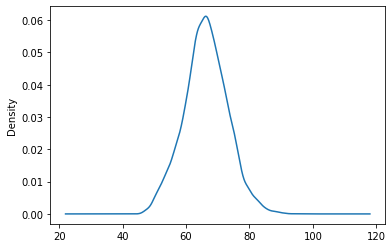

In [32]:
df['Overall'].plot(kind='density')
plt.show()

#### 2. Generate pair plots for the following variables:
   -- Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

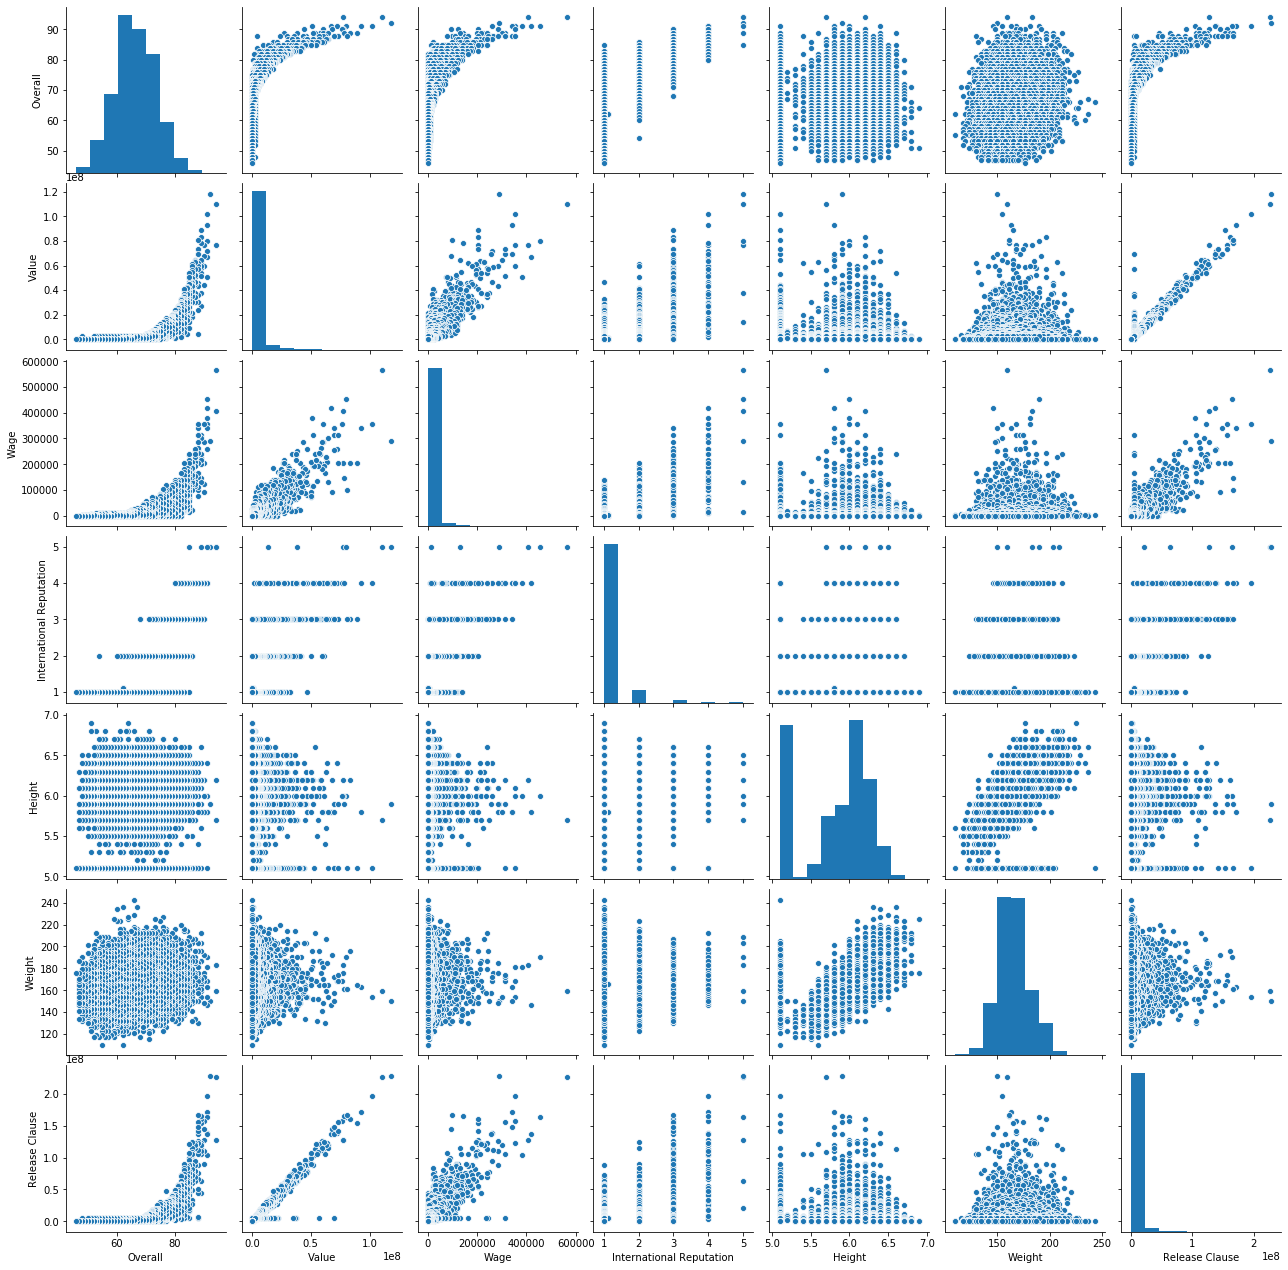

In [33]:
sns.pairplot(df[['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause']])
plt.show()

#### 3. Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020

In [34]:
top_20=df[df['Contract Valid Until']=='2020-01-01'].sort_values('Overall',ascending=False).head(20)
top_20

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
13,168542,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,Left,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0
21,179813,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,60000000.0,200000.0,Right,...,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0
31,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0
39,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,24000000.0,165000.0,Right,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44400000.0
50,175943,D. Mertens,31,Belgium,87,87,Napoli,45000000.0,135000.0,Right,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76500000.0


####    a) What would the average wage for this set of players be?

In [35]:
top_20['Wage'].mean()

205450.0

  ####  b) What is the average age?

In [36]:
top_20['Age'].mean()

30.65

####    c) Is there a correlation between the Overall rating and Value for these players?

In [37]:
top_20[['Overall','Value']].corr()

,Overall,Value
Overall,1.000000,0.786717
Value,0.786717,1.000000


* Positively correlated 

#### 4.	Generate tables containing the top 5 players by Overall rating for each unique position

In [38]:
position = df['Position'].unique()
position

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [39]:
top_5 = pd.DataFrame()
for i in position:
    top_5 = pd.concat([top_5,df[df['Position']==i].sort_values(['Overall']).head(5)])
top_5

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
10110,207659,L. Grozurek,26,Austria,65,66,SK Sturm Graz,625000.0,5000.0,Right,...,59.0,37.0,33.0,25.0,15.0,14.0,9.0,15.0,7.0,9.530000e+05
9388,157321,K. Tamada,38,Japan,66,66,Nagoya Grampus,220000.0,2000.0,Left,...,70.0,35.0,31.0,27.0,7.0,16.0,12.0,16.0,10.0,2.750000e+05
9506,232609,G. Notsuda,24,Japan,66,70,Vegalta Sendai,850000.0,3000.0,Left,...,62.0,39.0,39.0,40.0,12.0,7.0,7.0,11.0,7.0,4.585061e+06
6662,206605,A. Aosman,23,Syria,68,73,SG Dynamo Dresden,1200000.0,7000.0,Right,...,63.0,47.0,30.0,26.0,8.0,8.0,15.0,9.0,8.0,2.000000e+06
6108,224385,H. Yamada,29,Japan,69,69,Júbilo Iwata,1000000.0,4000.0,Right,...,64.0,51.0,48.0,46.0,9.0,15.0,9.0,7.0,16.0,1.300000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18070,236705,E. Dahlqvist,19,Sweden,50,64,IFK Göteborg,60000.0,1000.0,Left,...,52.0,40.0,48.0,51.0,8.0,7.0,12.0,13.0,12.0,1.130000e+05
17401,244864,F. Fridriksson,19,Iceland,54,70,Vejle Boldklub,130000.0,1000.0,Left,...,36.0,55.0,56.0,51.0,13.0,14.0,8.0,14.0,7.0,2.440000e+05
16863,243608,R. Giles,18,England,56,76,Wolverhampton Wanderers,170000.0,3000.0,Left,...,56.0,46.0,49.0,48.0,14.0,6.0,5.0,8.0,8.0,4.930000e+05
16937,233931,K. Rowles,20,Australia,56,71,Central Coast Mariners,180000.0,1000.0,Left,...,41.0,53.0,58.0,55.0,13.0,12.0,6.0,10.0,9.0,3.380000e+05


####    a) Are there any players appearing in more than one Table. Please point out such players

In [40]:
top_5['Name'].duplicated().value_counts()

False    135
Name: Name, dtype: int64

* No players appeared in different positions

####    b) What is the average wage one can expect to pay for the top 5 in every position?

In [41]:
top_5.groupby('Position')['Wage'].mean()

Position
CAM    1000.000000
CB     1000.000000
CDM    1000.000000
CF     1000.000000
CM     1000.000000
GK     1000.000000
LAM    3800.000000
LB     1000.000000
LCB    1000.000000
LCM    1800.000000
LDM    2972.370032
LF     2600.000000
LM     1200.000000
LS     1400.000000
LW     1000.000000
LWB    1600.000000
RAM    4000.000000
RB     1000.000000
RCB    1000.000000
RCM    1200.000000
RDM    1200.000000
RF     4200.000000
RM     1200.000000
RS     2000.000000
RW     1200.000000
RWB    1000.000000
ST     1000.000000
Name: Wage, dtype: float64

--------------------------------------------------------------